In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import warnings

warnings.filterwarnings("ignore")

In [22]:
# Construct the relative path to the CSV file
current_dir = os.getcwd()
relative_path = os.path.join(current_dir, '../data/flights_data.csv')
csv_path = os.path.normpath(relative_path)

In [35]:
def get_substring_before_h(input_string):
    # Split the string at the first occurrence of 'h'
    parts = input_string.split('h', 1)
    # Return the part before 'h'
    output = parts[0] if len(parts) > 1 else input_string
    output = int(output.strip())
    return output


def fill_airline():
    # Split the string at the first occurrence of 'h'
    dic_airlines = {
        'Japan Airlines operado por Aeromexico': 'Japan Airlines',
        'Air France operado por Aeromexico': 'Air France',
        'Japan Airlines operado por American Airlines': 'Japan Airlines',
        'Aerolíneas múltiples operado por United': 'Aerolíneas múltiples',
        'American Airlines operado por American Airlines y Japan Airlines': 'American Airlines',
        'United operado por United y All Nippon Airways': 'United',
        'Japan Airlines operado por American Airlines y Japan Airlines': 'Japan Airlines',
        'All Nippon Airways operado por United y All Nippon Airways': 'All Nippon Airways',
        'KLM operado por Aeromexico y KLM': 'KLM',
        'Aerolíneas múltiples operado por American Airlines': 'Aerolíneas múltiples',
        'All Nippon Airways operado por United': 'All Nippon Airways',
        'Aerolíneas múltiples operado por Air Canada y STARFLYER': 'Aerolíneas múltiples',
        'Aerolíneas múltiples operado por Air Canada y Air Nippon Network': 'Aerolíneas múltiples',
        'Aerolíneas múltiples operado por United y STARFLYER': 'KLM',
        'Aerolíneas múltiples operado por United y Air Nippon Network': 'Aerolíneas múltiples',
        'Aerolíneas múltiples operado por American Airlines, Envoy Air As American Eagle y Japan Airlines': 'Aerolíneas múltiples'
    }

    for key, value in dic_airlines.items():
        df_train.loc[df_train['Airline'] == key, 'Airline'] = value

def temporada():
    

    temporadas_japon = {
    1: "Baja",
    2: "Baja",
    3: "Media",
    4: "Alta",
    5: "Media",
    6: "Baja",
    7: "Media",
    8: "Alta",
    9: "Media",
    10: "Media",
    11: "Alta",
    12: "Alta"
    }

    for key, value in temporadas_japon.items():
        df_train.loc[df_train['Month'] == key, 'Temporada'] = value


df_train = pd.read_csv(csv_path)

df_train = df_train[df_train['Page'].astype(str).str.lower() == 'expedia']

df_train['Price'].replace(r"\D+", "", regex=True, inplace=True)
df_train['Price'] = df_train['Price'].astype(int)
df_train = df_train[df_train['Price'] < 50000]

df_train.loc[df_train['Stop over'] == '1 escala', 'Stop over'] = '1'
df_train.loc[df_train['Stop over'] == '2 escalas', 'Stop over'] = '2'
df_train.loc[df_train['Stop over'] == 'Vuelo sin escalas', 'Stop over'] = '0'


df_train['Destination place'] = df_train['Destination place'].str.replace(r'[()]', '', regex=True)

df_train['Stop over'] = df_train['Stop over'].astype(int)

df_train['Days to date'] = df_train['Days to date'].astype(int)

df_train['Flight time'] = df_train['Flight time'].apply(get_substring_before_h)

df_train['Month'] = pd.to_datetime(df_train['Date of flight']).dt.month


df_flight = df_train[df_train['Stop over'] == 0]
df_train['Stop over time'] = df_train['Flight time'] - int(df_flight['Flight time'].mean())
df_train['Stop over time'].loc[df_train['Stop over'] == 0] = 0


df_train.drop(['Stop over place','Departure time','Date of flight', 'Page','Class','Airline 1','Airline 2','Airline 3'], axis=1, inplace=True)

df_train['Temporada'] = ''
temporada()
fill_airline()

In [36]:
# Contar columnas cualitativas (categóricas)
qualitative_columns = df_train.select_dtypes(include=['object', 'category']).columns
num_qualitative = len(qualitative_columns)

# Contar columnas cuantitativas (numéricas)
quantitative_columns = df_train.select_dtypes(include=['number']).columns
num_quantitative = len(quantitative_columns)

print(f"Number of qualitative columns: {num_qualitative}")
print(f"Qualitative columns: {list(qualitative_columns)}")
print(f"Number of quantitative columns: {num_quantitative}")
print(f"Quantitative columns: {list(quantitative_columns)}")

Number of qualitative columns: 6
Qualitative columns: ['Airline', 'Destination place', 'Origin place', 'Flight type', 'Day of week', 'Temporada']
Number of quantitative columns: 6
Quantitative columns: ['Price', 'Flight time', 'Stop over', 'Days to date', 'Month', 'Stop over time']


In [33]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

unique_values = {
    'Temporada': df_train['Temporada'].unique(),
    'Destination place': df_train['Destination place'].unique(),
    'Airline': df_train['Airline'].unique(),
    'Day of week': df_train['Day of week'].unique(),
    'Flight type': df_train['Flight type'].unique()
}

categorical_cols = ['Temporada', 'Destination place', 'Airline', 'Day of week', 'Flight type']

# Crear una instancia de OneHotEncoder (desactiva los arrays dispersos si quieres un DataFrame)
encoder = OneHotEncoder(sparse_output=False)

# Ajustar el codificador a tus columnas categóricas
encoder.fit(df_train[categorical_cols])

OneHotEncoder(sparse_output=False)

In [38]:
from sklearn.preprocessing import OneHotEncoder
unique_values = {
    'Month':[1,2,3,4,5,6,7,8,9,10,11,12],
    'Destination place': ['Tokio NRT', 'Tokio HND'], 
    'Airline': ['Aerolíneas múltiples', 'All Nippon Airways', 'Japan Airlines','Air Canada', 'Turkish Airlines', 'United', 'American Airlines','Emirates', 'Iberia', 'Aeromexico', 'KLM', 'Air France'],
    'Day of week': ['Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday','Monday'], 
    'Flight type': ['Morning flight', 'Night flight', 'Day flight']
    }


df_unique = pd.DataFrame(dict([(k, pd.Series(v)) for k, v in unique_values.items()]))
encoder = OneHotEncoder(sparse_output=False)

# Ajustar el codificador a tus columnas categóricas
encoder.fit(df_unique)

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(["Baja", "Media", "Alta"])

LabelEncoder()

In [39]:
df_train['Temporada'] = le.transform(df_train['Temporada'])

In [40]:
df_flight = df_train[df_train['Stop over'] == 0]
int(df_flight['Flight time'].mean())
df_train['Stop over time'] = df_train['Flight time'] - int(df_flight['Flight time'].mean())
df_train['Stop over time'].loc[df_train['Stop over'] == 0] = 0

In [41]:
# Ajustar y transformar los datos
encoded_data = encoder.transform(df_train[['Month','Destination place', 'Airline', 'Day of week', 'Flight type']])

# Crear un DataFrame con los datos codificados
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(['Month','Destination place', 'Airline', 'Day of week', 'Flight type']))
df_train.reset_index(drop=True, inplace=True)
# Concatenar el DataFrame original (sin las columnas codificadas) con el DataFrame codificado
df_train = pd.concat([df_train.drop(columns=['Month','Stop over time','Origin place','Destination place', 'Airline', 'Day of week', 'Flight type']), encoded_df], axis=1)

In [42]:
df_train

,Price,Flight time,Stop over,Days to date,Temporada,Month_1,Month_2,Month_3,Month_4,Month_5,...,Day of week_Saturday,Day of week_Sunday,Day of week_Thursday,Day of week_Tuesday,Day of week_Wednesday,Day of week_nan,Flight type_Day flight,Flight type_Morning flight,Flight type_Night flight,Flight type_nan
0,16690,19,1,0,1,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,16690,30,1,0,1,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,31323,14,0,0,1,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,30567,15,0,0,1,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,16471,23,2,0,1,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8103,30771,24,1,329,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
8104,24414,23,2,329,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
8105,39022,17,1,329,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
8106,39022,17,1,329,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [44]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import joblib

X = df_train.drop(columns=['Price'])
y = df_train['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Definir los modelos
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(max_depth=30, min_samples_leaf=5, min_samples_split=20),
    'Random Forest': RandomForestRegressor(n_estimators=100, max_depth=30, min_samples_leaf=1, min_samples_split=2),
    'Support Vector Machine': SVR(C=10, gamma='scale', kernel='linear'),
    'K-Nearest Neighbors': KNeighborsRegressor(n_neighbors=5),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3),
    'XGBoost': XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=3)
}

best_model_name = None
best_model = None
best_r2 = float('-inf')

results = {}

for model_name, model in models.items():
    model.fit(X_train, y_train)

    # Métricas en entrenamiento
    y_train_pred = model.predict(X_train)
    mse_train = mean_squared_error(y_train, y_train_pred)
    rmse_train = np.sqrt(mse_train)
    mae_train = mean_absolute_error(y_train, y_train_pred)
    r2_train = r2_score(y_train, y_train_pred)

    # Métricas en prueba
    y_test_pred = model.predict(X_test)
    mse_test = mean_squared_error(y_test, y_test_pred)
    rmse_test = np.sqrt(mse_test)
    mae_test = mean_absolute_error(y_test, y_test_pred)
    r2_test = r2_score(y_test, y_test_pred)

    # Guardar métricas
    results[model_name] = {
        'Train': {'MSE': mse_train, 'RMSE': rmse_train, 'MAE': mae_train, 'R2': r2_train},
        'Test': {'MSE': mse_test, 'RMSE': rmse_test, 'MAE': mae_test, 'R2': r2_test}
    }

    # Comparar para buscar mejor modelo (según R2 en test)
    if r2_test > best_r2:
        best_model_name = model_name
        best_model = model
        best_r2 = r2_test

    # Guardar el modelo en /models
    joblib.dump(model, f'./models/{model_name.replace(" ", "_")}.pkl')

# Mostrar los resultados
for model_name, metrics in results.items():
    print(f"{model_name} - Train - MSE: {metrics['Train']['MSE']:.2f}, RMSE: {metrics['Train']['RMSE']:.2f}, MAE: {metrics['Train']['MAE']:.2f}, R2: {metrics['Train']['R2']:.2f}")
    print(f"{model_name} - Test  - MSE: {metrics['Test']['MSE']:.2f}, RMSE: {metrics['Test']['RMSE']:.2f}, MAE: {metrics['Test']['MAE']:.2f}, R2: {metrics['Test']['R2']:.2f}\n")

print(f"Mejor modelo: {best_model_name} (R2 = {best_r2:.2f})")

Linear Regression - Train - MSE: 9109690.73, RMSE: 3018.23, MAE: 2128.61, R2: 0.37
Linear Regression - Test  - MSE: 8726893.92, RMSE: 2954.13, MAE: 2125.93, R2: 0.38

Decision Tree - Train - MSE: 3036905.39, RMSE: 1742.67, MAE: 872.29, R2: 0.79
Decision Tree - Test  - MSE: 4250704.19, RMSE: 2061.72, MAE: 1051.26, R2: 0.70

Random Forest - Train - MSE: 589149.06, RMSE: 767.56, MAE: 351.28, R2: 0.96
Random Forest - Test  - MSE: 3184463.92, RMSE: 1784.51, MAE: 867.62, R2: 0.77

Support Vector Machine - Train - MSE: 11007453.63, RMSE: 3317.75, MAE: 2103.36, R2: 0.24
Support Vector Machine - Test  - MSE: 10560844.29, RMSE: 3249.75, MAE: 2091.93, R2: 0.25

K-Nearest Neighbors - Train - MSE: 3977097.58, RMSE: 1994.27, MAE: 1210.75, R2: 0.72
K-Nearest Neighbors - Test  - MSE: 5550951.08, RMSE: 2356.05, MAE: 1513.50, R2: 0.61

Gradient Boosting - Train - MSE: 5163755.82, RMSE: 2272.39, MAE: 1499.43, R2: 0.64
Gradient Boosting - Test  - MSE: 5334320.82, RMSE: 2309.61, MAE: 1544.35, R2: 0.62

XGB

In [ ]:
import os
import joblib

models = {}
models_folder = './models'

for filename in os.listdir(models_folder):
    if filename.endswith('.pkl'):
        # Extract model name from filename (replace underscores with spaces if needed)
        model_name = filename.replace('.pkl', '').replace('_', ' ')
        model_path = os.path.join(models_folder, filename)
        models[model_name] = joblib.load(model_path)

# Now 'models' is a dictionary containing the loaded models
for name, model in models.items():
    print(f"Loaded model: {name}")

In [71]:
df_train = df_train.drop(index=1)

In [75]:
df_train.drop(['Dates to date'], axis=1, inplace=True)

In [88]:
df_train.at[0,'Days to date'] = 2

In [85]:
df_train['Month'] = 2

In [89]:
X_test = df_train.drop(columns=['Price'])
y_test_pred = model.predict(X_test)
y_test_pred

array([26208.334], dtype=float32)

In [10]:
grouped_df_stop_over = df_train.groupby('Stop over')['Price'].mean().reset_index()
grouped_df_stop_over = grouped_df_stop_over.sort_values(by='Price', ascending=False)
grouped_df_temporada = df_train.groupby('Temporada')['Price'].mean().reset_index()
grouped_df_temporada = grouped_df_temporada.sort_values(by='Price', ascending=False)
grouped_df_day_week = df_train.groupby('Day of week')['Price'].mean().reset_index()
grouped_df_day_week = grouped_df_day_week.sort_values(by='Price', ascending=False)
grouped_df_destination = df_train.groupby('Destination place')['Price'].mean().reset_index()
grouped_df_destination = grouped_df_destination.sort_values(by='Price', ascending=False)
grouped_df_days_to = df_train.groupby('Days to date')['Price'].mean().reset_index()
grouped_df_days_to = grouped_df_days_to.sort_values(by='Days to date', ascending=False)

grouped_df_month = df_train.groupby('Month')['Price'].mean().reset_index()
grouped_df_month = grouped_df_month.sort_values(by='Month', ascending=False)

grouped_days_stop_over = df_train.groupby(['Days to date','Stop over'])['Price'].mean().reset_index()
grouped_days_stop_over_min = df_train.groupby(['Days to date','Stop over'])['Price'].min().reset_index()


# Promedio de precio por escalas, temporada, dia de la semana y lugar de destino.

Tratando de generar el primero contacto, al observar las primeras graficas de barras, se puede apreciar que existen tendecias pero son minimas, realmente no son del todo determinantes.

## Gráficos

1. Generalizar no ayudara al la exactitud de los datos
2. Se pueden apreciar tendencia que tienen un impacto en el precio como el numero de escalas, el dia de la semana y el lugar de destino.
3. Sin embargo existen factores que deberian tener mucha relacion con el impacto del precio pero no lo tienen, almenos en este ejemplo.


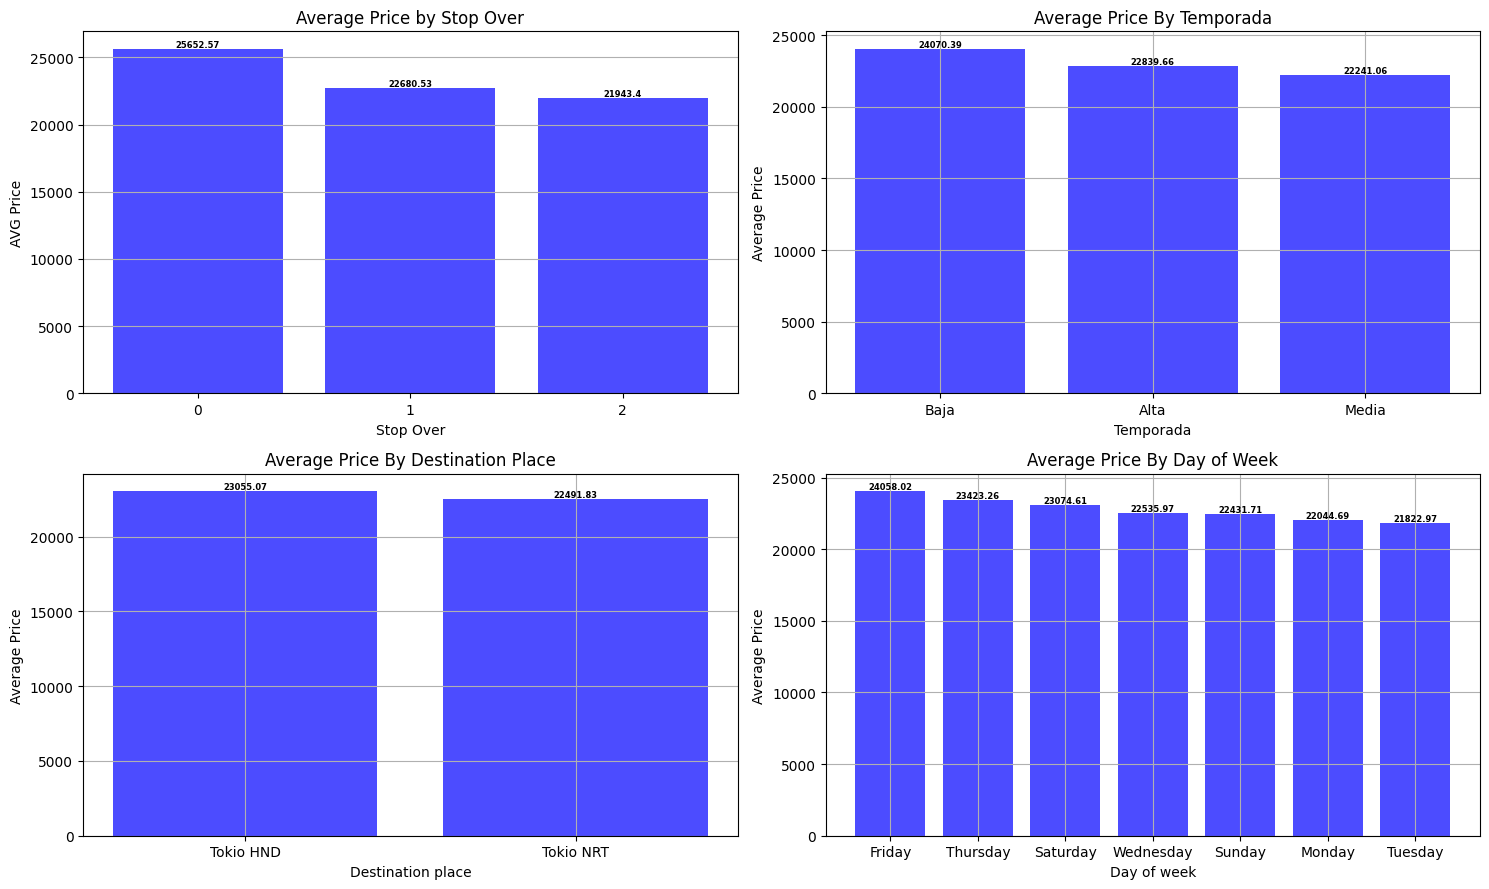

In [11]:
from IPython.display import display, Markdown

# Mostrar texto formateado
display(Markdown("""
# Promedio de precio por escalas, temporada, dia de la semana y lugar de destino.

Tratando de generar el primero contacto, al observar las primeras graficas de barras, se puede apreciar que existen tendecias pero son minimas, realmente no son del todo determinantes.

## Gráficos

1. Generalizar no ayudara al la exactitud de los datos
2. Se pueden apreciar tendencia que tienen un impacto en el precio como el numero de escalas, el dia de la semana y el lugar de destino.
3. Sin embargo existen factores que deberian tener mucha relacion con el impacto del precio pero no lo tienen, almenos en este ejemplo.
"""))


def add_labels(bars, ax):
    for bar in bars:
        yval = bar.get_height()
        ax.text(
            bar.get_x() + bar.get_width() / 2, 
            yval + 2,  # Add some padding to the label
            round(yval, 2), 
            ha='center', 
            va='bottom',
            fontsize=6,  # Set font size
            color='black',  # Set font color
            fontweight='bold'  # Set font weight
        )

fig, axs = plt.subplots(2, 2, figsize=(15, 9))  # 2 rows, 1 column

# Bar chart for price by stop over
bar = axs[0,0].bar(grouped_df_stop_over['Stop over'].astype(str), grouped_df_stop_over['Price'], color='b', alpha=0.7)
axs[0,0].set_title('Average Price by Stop Over')
axs[0,0].set_xlabel('Stop Over')
axs[0,0].set_ylabel('AVG Price')
axs[0,0].grid(axis='y')

add_labels(bar, axs[0, 0])

# Line chart for duration by stop over
bar = axs[0,1].bar(grouped_df_temporada['Temporada'] ,grouped_df_temporada['Price'], color='b', alpha=0.7)
axs[0,1].set_title('Average Price By Temporada')
axs[0,1].set_xlabel('Temporada')
axs[0,1].set_ylabel('Average Price')
axs[0,1].grid(True)
add_labels(bar, axs[0, 1])

bar = axs[1,1].bar(grouped_df_day_week['Day of week'] ,grouped_df_day_week['Price'], color='b', alpha=0.7)
axs[1,1].set_title('Average Price By Day of Week')
axs[1,1].set_xlabel('Day of week')
axs[1,1].set_ylabel('Average Price')
axs[1,1].grid(True)
add_labels(bar, axs[1, 1])

bar = axs[1,0].bar(grouped_df_destination['Destination place'] ,grouped_df_destination['Price'], color='b', alpha=0.7)
axs[1,0].set_title('Average Price By Destination Place')
axs[1,0].set_xlabel('Destination place')
axs[1,0].set_ylabel('Average Price')
axs[1,0].grid(True)
add_labels(bar, axs[1, 0])

# Display the chart
plt.tight_layout()  # Adjust layout to make room for labels
plt.show()


posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and pos

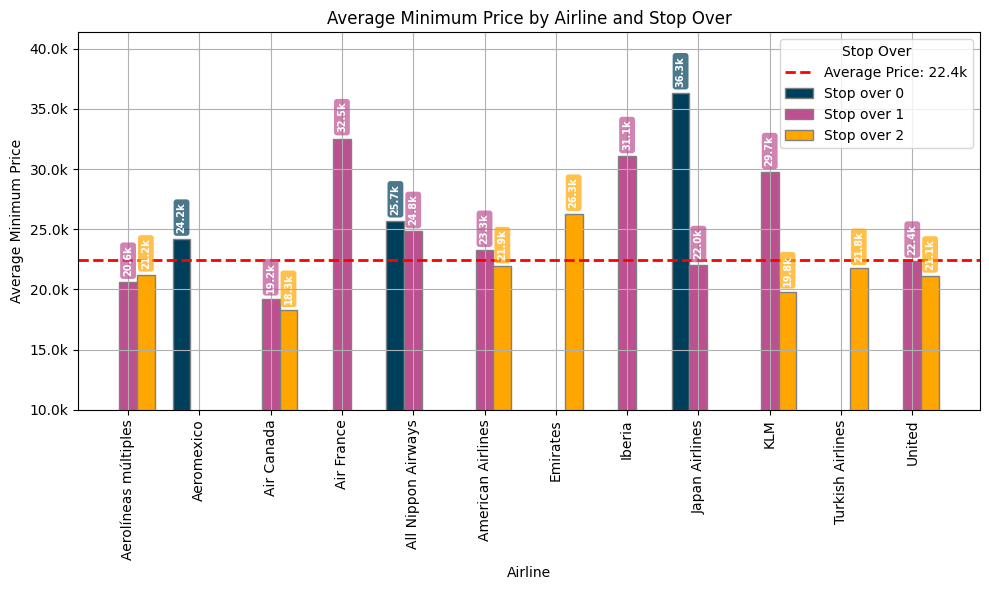

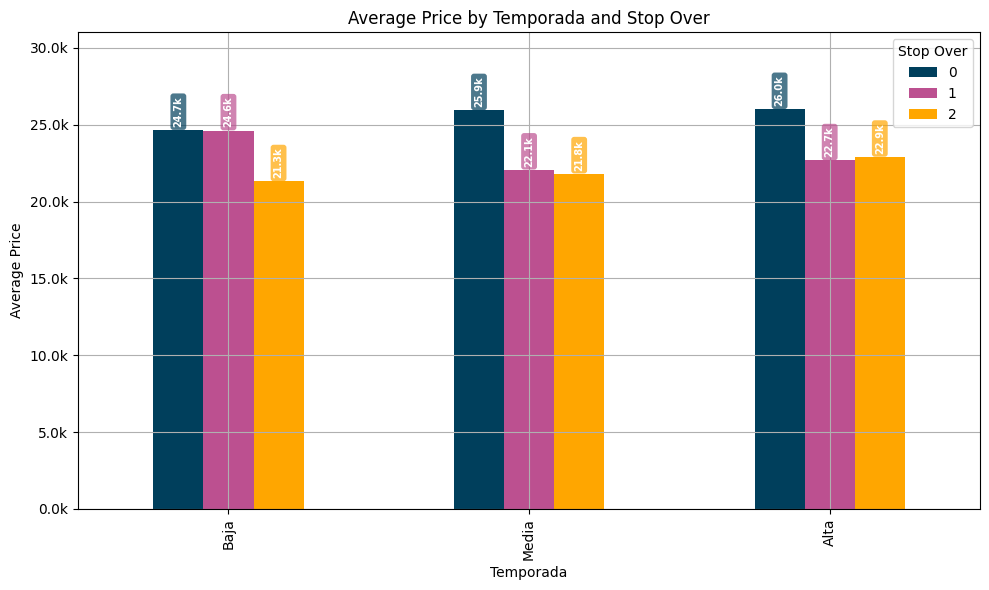

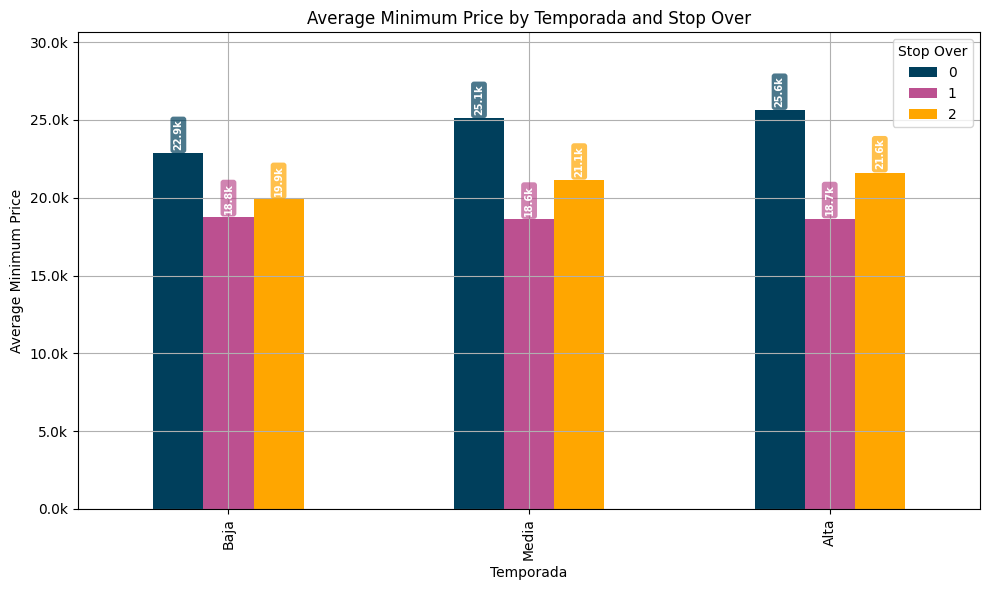

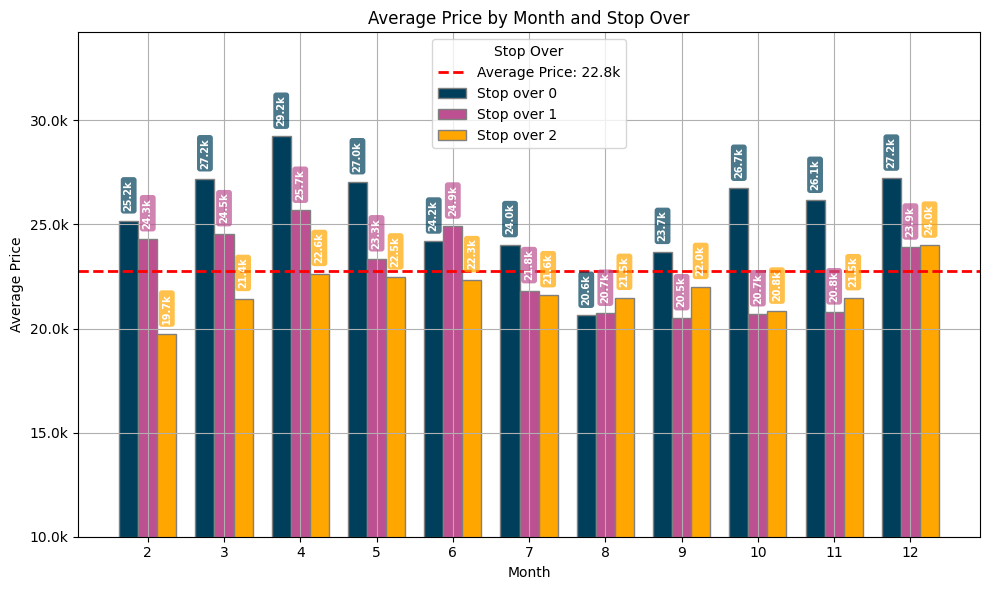

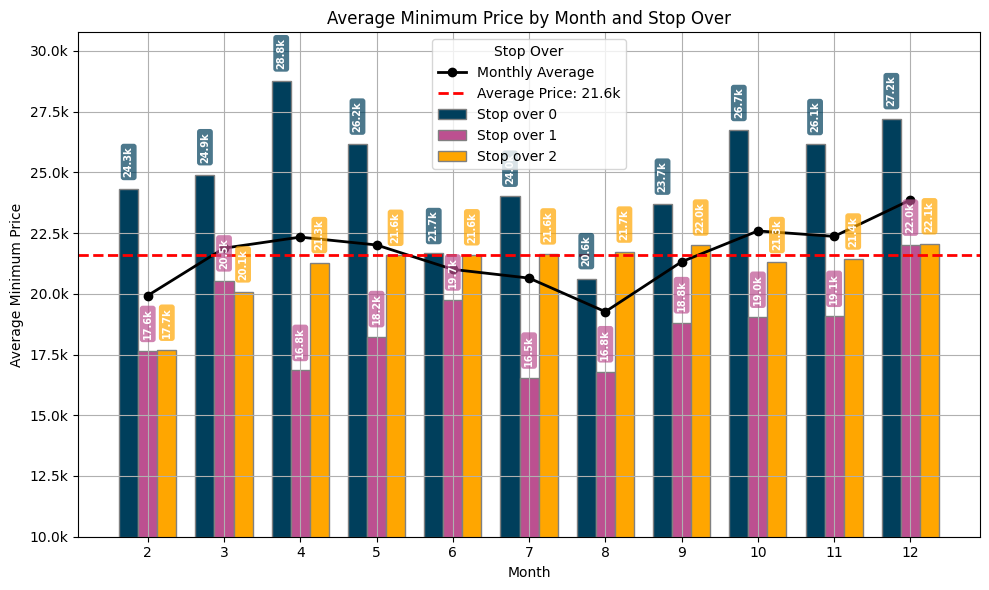

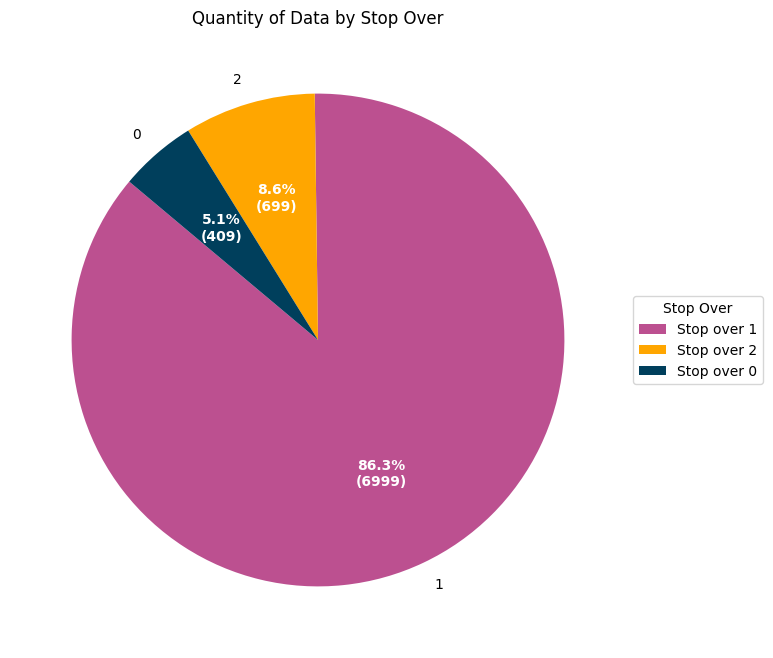

"grouped_df_month = df_train[df_train['Stop over'] == 0].groupby('Month')['Price'].mean().reset_index()\ngrouped_df_month = grouped_df_month.sort_values(by='Month', ascending=False)\n\nplt.figure(figsize=(10, 5))\n\nplt.bar(grouped_df_month['Month'], grouped_df_month['Price'], color='blue')\nplt.title('Average price by month')\nplt.show()"

In [42]:
from matplotlib.ticker import FuncFormatter







# Agrupar los datos por 'Airline', 'Days to date' y 'Stop over' y calcular el precio mínimo
grouped_days_stop_over = df_train.groupby(['Airline', 'Days to date', 'Stop over'])['Price'].min().reset_index()

# Agrupar los datos por 'Airline' y 'Stop over' y calcular el promedio de los precios mínimos
grouped_df_airline = grouped_days_stop_over.groupby(['Airline', 'Stop over'])['Price'].mean().unstack()

# Definir el diccionario de colores
color_dict = {0: '#003f5c', 1: '#bc5090', 2: '#ffa600'}
colors = [color_dict[key] for key in grouped_df_airline.columns]

# Crear la figura y el eje
fig, ax = plt.subplots(figsize=(10, 6))

# Definir el ancho de las barras
bar_width = 0.25

# Definir las posiciones de las barras
r1 = np.arange(len(grouped_df_airline))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]

# Crear las barras
bars1 = ax.bar(r1, grouped_df_airline[0], color=color_dict[0], width=bar_width, edgecolor='grey', label='Stop over 0')
bars2 = ax.bar(r2, grouped_df_airline[1], color=color_dict[1], width=bar_width, edgecolor='grey', label='Stop over 1')
bars3 = ax.bar(r3, grouped_df_airline[2], color=color_dict[2], width=bar_width, edgecolor='grey', label='Stop over 2')

# Calcular el precio promedio general
average_price = grouped_days_stop_over['Price'].mean()

# Agregar la línea de precio promedio
ax.axhline(average_price, color='red', linestyle='--', linewidth=2, label=f'Average Price: {average_price/1000:.1f}k')

# Formatear las etiquetas del eje y
def y_formatter(x, pos):
    return f'{x/1000:.1f}k'
ax.yaxis.set_major_formatter(FuncFormatter(y_formatter))

# Añadir etiquetas a las barras
def add_labels(bars, ax, color):
    for bar in bars:
        yval = bar.get_height()
        ax.text(
            bar.get_x() + bar.get_width() / 2, 
            yval + 500,  # Añadir un poco de padding a la etiqueta
            f'{yval/1000:.1f}k', 
            ha='center', 
            va='bottom',
            fontsize=7,  # Tamaño de la fuente
            color='white',  # Color de la fuente
            fontweight='bold',  # Grosor de la fuente
            rotation=90,  # Rotar la etiqueta
            bbox=dict(facecolor=color, alpha=0.7, edgecolor='none', boxstyle='round,pad=0.3')  # Fondo de la etiqueta
        )

# Añadir etiquetas a cada barra
add_labels(bars1, ax, color_dict[0])
add_labels(bars2, ax, color_dict[1])
add_labels(bars3, ax, color_dict[2])

# Personalizar la gráfica
ax.set_title('Average Minimum Price by Airline and Stop Over')
ax.set_xlabel('Airline')
ax.set_ylabel('Average Minimum Price')
ax.set_xticks([r + bar_width for r in range(len(grouped_df_airline))])
ax.set_xticklabels(grouped_df_airline.index, rotation=90)
ax.grid(True)
ax.legend(title='Stop Over')

# Ajustar el rango del eje y
ax.set_ylim(10000, grouped_df_airline.max().max() + 5000)

# Mostrar la gráfica
plt.tight_layout()
plt.show()















# Agrupar por temporada y tipo de "stop over" y calcular el precio promedio
grouped_df = df_train.groupby(['Temporada', 'Stop over'])['Price'].mean().unstack()

fig, ax = plt.subplots(figsize=(10, 6))

# Crear la gráfica de barras agrupadas
color_dict = {0: '#003f5c', 1: '#bc5090', 2: '#ffa600'}
colors = ['#003f5c', '#bc5090','#ffa600']  # Lista de colores para las barras
bars = grouped_df.plot(kind='bar', ax=ax, alpha=1, color=colors)

# Personalizar la gráfica
ax.set_title('Average Price by Temporada and Stop Over')
ax.set_xlabel('Temporada')
ax.set_ylabel('Average Price')
ax.grid(True)
ax.legend(title='Stop Over')

# Ajustar el rango del eje y
ax.set_ylim(0, grouped_df.max().max() + 5000)

# Formatear las etiquetas del eje y
def y_formatter(x, pos):
    return f'{x/1000:.1f}k'
ax.yaxis.set_major_formatter(FuncFormatter(y_formatter))

# Añadir etiquetas a las barras
def add_labels(bars, ax, color):
    for bar in bars:
        yval = bar.get_height()
        ax.text(
            bar.get_x() + bar.get_width() / 2, 
            yval + 200,  # Añadir un poco de padding a la etiqueta
            f'{yval/1000:.1f}k', 
            ha='center', 
            va='bottom',
            fontsize=7,  # Tamaño de la fuente
            color='white',  # Color de la fuente
            fontweight='bold',  # Grosor de la fuente
            rotation=90,  # Rotar la etiqueta
            bbox=dict(facecolor=color, alpha=0.7, edgecolor='none', boxstyle='round,pad=0.3')  # Fondo de la etiqueta
        )

# Añadir etiquetas a cada barra
for container, color in zip(ax.containers, colors):
    add_labels(container, ax, color)

# Mostrar la gráfica
plt.tight_layout()
plt.show()








# Definir el orden de las categorías
season_order = pd.CategoricalDtype(categories=['Baja', 'Media', 'Alta'], ordered=True)
df_train['Temporada'] = df_train['Temporada'].astype(season_order)

# Agrupar los datos por 'Temporada', 'Days to date' y 'Stop over' y calcular el precio mínimo
grouped_days_stop_over = df_train.groupby(['Temporada', 'Days to date', 'Stop over'])['Price'].min().reset_index()

# Agrupar los datos por 'Temporada' y 'Stop over' y calcular el promedio de los precios mínimos
grouped_df = grouped_days_stop_over.groupby(['Temporada', 'Stop over'])['Price'].mean().unstack()

fig, ax = plt.subplots(figsize=(10, 6))

# Crear la gráfica de barras agrupadas
color_dict = {0: '#003f5c', 1: '#bc5090', 2: '#ffa600'}
colors = ['#003f5c', '#bc5090','#ffa600']  # Lista de colores para las barras
bars = grouped_df.plot(kind='bar', ax=ax, alpha=1, color=colors)

# Calcular el precio promedio general
average_price = grouped_days_stop_over['Price'].mean()

# Agregar la línea de precio promedio general
#ax.axhline(average_price, color='red', linestyle='--', linewidth=2, label=f'Average Price: {average_price/1000:.1f}k')

# Personalizar la gráfica
ax.set_title('Average Minimum Price by Temporada and Stop Over')
ax.set_xlabel('Temporada')
ax.set_ylabel('Average Minimum Price')
ax.grid(True)

# Ajustar el rango del eje y
ax.set_ylim(0, grouped_df.max().max() + 5000)

# Formatear las etiquetas del eje y
def y_formatter(x, pos):
    return f'{x/1000:.1f}k'
ax.yaxis.set_major_formatter(FuncFormatter(y_formatter))

# Añadir etiquetas a las barras
def add_labels(bars, ax, color):
    for bar in bars:
        yval = bar.get_height()
        ax.text(
            bar.get_x() + bar.get_width() / 2, 
            yval + 200,  # Añadir un poco de padding a la etiqueta
            f'{yval/1000:.1f}k', 
            ha='center', 
            va='bottom',
            fontsize=7,  # Tamaño de la fuente
            color='white',  # Color de la fuente
            fontweight='bold',  # Grosor de la fuente
            rotation=90,  # Rotar la etiqueta
            bbox=dict(facecolor=color, alpha=0.7, edgecolor='none', boxstyle='round,pad=0.3')  # Fondo de la etiqueta
        )

# Añadir etiquetas a cada barra
for container, color in zip(ax.containers, colors):
    add_labels(container, ax, color)

# Mover la leyenda a la derecha
ax.legend(title='Stop Over')

# Mostrar la gráfica
plt.tight_layout()
plt.show()









grouped_df_month = df_train.groupby(['Month', 'Stop over'])['Price'].mean().unstack()

# Definir el diccionario de colores
color_dict = {0: '#003f5c', 1: '#bc5090', 2: '#ffa600'}
colors = [color_dict[key] for key in grouped_df_month.columns]

# Crear la figura y el eje
fig, ax = plt.subplots(figsize=(10, 6))

# Definir el ancho de las barras
bar_width = 0.25

# Definir las posiciones de las barras
r1 = np.arange(len(grouped_df_month))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]

# Crear las barras
bars1 = ax.bar(r1, grouped_df_month[0], color=color_dict[0], width=bar_width, edgecolor='grey', label='Stop over 0')
bars2 = ax.bar(r2, grouped_df_month[1], color=color_dict[1], width=bar_width, edgecolor='grey', label='Stop over 1')
bars3 = ax.bar(r3, grouped_df_month[2], color=color_dict[2], width=bar_width, edgecolor='grey', label='Stop over 2')

# Calcular el precio promedio general
average_price = df_train['Price'].mean()

# Agregar la línea de precio promedio
ax.axhline(average_price, color='red', linestyle='--', linewidth=2, label=f'Average Price: {average_price/1000:.1f}k')

# Formatear las etiquetas del eje y
def y_formatter(x, pos):
    return f'{x/1000:.1f}k'
ax.yaxis.set_major_formatter(FuncFormatter(y_formatter))

# Añadir etiquetas a las barras
def add_labels(bars, ax, color):
    for bar in bars:
        yval = bar.get_height()
        ax.text(
            bar.get_x() + bar.get_width() / 2, 
            yval + 500,  # Añadir un poco de padding a la etiqueta
            f'{yval/1000:.1f}k', 
            ha='center', 
            va='bottom',
            fontsize=7,  # Tamaño de la fuente
            color='white',  # Color de la fuente
            fontweight='bold',  # Grosor de la fuente
            rotation=90,  # Rotar la etiqueta
            bbox=dict(facecolor=color, alpha=0.7, edgecolor='none', boxstyle='round,pad=0.3')  # Fondo de la etiqueta
        )

# Añadir etiquetas a cada barra
add_labels(bars1, ax, color_dict[0])
add_labels(bars2, ax, color_dict[1])
add_labels(bars3, ax, color_dict[2])

# Personalizar la gráfica
ax.set_title('Average Price by Month and Stop Over')
ax.set_xlabel('Month')
ax.set_ylabel('Average Price')
ax.set_xticks([r + bar_width for r in range(len(grouped_df_month))])
ax.set_xticklabels(grouped_df_month.index)
ax.grid(True)
ax.legend(title='Stop Over')

# Ajustar el rango del eje y
ax.set_ylim(10000, grouped_df_month.max().max() + 5000)

# Mostrar la gráfica
plt.tight_layout()
plt.show()





# Agrupar los datos por 'Month', 'Days to date' y 'Stop over' y calcular el precio mínimo
grouped_days_stop_over = df_train.groupby(['Month', 'Days to date', 'Stop over'])['Price'].min().reset_index()

# Agrupar los datos por 'Month' y 'Stop over' y calcular el promedio de los precios mínimos
grouped_df_month = grouped_days_stop_over.groupby(['Month', 'Stop over'])['Price'].mean().unstack()

# Calcular el precio promedio por mes
monthly_avg = grouped_days_stop_over.groupby('Month')['Price'].mean()

# Definir el diccionario de colores
color_dict = {0: '#003f5c', 1: '#bc5090', 2: '#ffa600'}
colors = [color_dict[key] for key in grouped_df_month.columns]

# Crear la figura y el eje
fig, ax = plt.subplots(figsize=(10, 6))

# Definir el ancho de las barras
bar_width = 0.25

# Definir las posiciones de las barras
r1 = np.arange(len(grouped_df_month))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]

# Crear las barras
bars1 = ax.bar(r1, grouped_df_month[0], color=color_dict[0], width=bar_width, edgecolor='grey', label='Stop over 0')
bars2 = ax.bar(r2, grouped_df_month[1], color=color_dict[1], width=bar_width, edgecolor='grey', label='Stop over 1')
bars3 = ax.bar(r3, grouped_df_month[2], color=color_dict[2], width=bar_width, edgecolor='grey', label='Stop over 2')

# Agregar la línea de precio promedio por mes
ax.plot(r1 + bar_width, monthly_avg, color='black', linestyle='-', linewidth=2, marker='o', label='Monthly Average')

# Calcular el precio promedio general
average_price = grouped_days_stop_over['Price'].mean()

# Agregar la línea de precio promedio general
ax.axhline(average_price, color='red', linestyle='--', linewidth=2, label=f'Average Price: {average_price/1000:.1f}k')

# Formatear las etiquetas del eje y
def y_formatter(x, pos):
    return f'{x/1000:.1f}k'
ax.yaxis.set_major_formatter(FuncFormatter(y_formatter))

# Añadir etiquetas a las barras
def add_labels(bars, ax, color):
    for bar in bars:
        yval = bar.get_height()
        ax.text(
            bar.get_x() + bar.get_width() / 2, 
            yval + 500,  # Añadir un poco de padding a la etiqueta
            f'{yval/1000:.1f}k', 
            ha='center', 
            va='bottom',
            fontsize=7,  # Tamaño de la fuente
            color='white',  # Color de la fuente
            fontweight='bold',  # Grosor de la fuente
            rotation=90,  # Rotar la etiqueta
            bbox=dict(facecolor=color, alpha=0.7, edgecolor='none', boxstyle='round,pad=0.3')  # Fondo de la etiqueta
        )

# Añadir etiquetas a cada barra
add_labels(bars1, ax, color_dict[0])
add_labels(bars2, ax, color_dict[1])
add_labels(bars3, ax, color_dict[2])

# Personalizar la gráfica
ax.set_title('Average Minimum Price by Month and Stop Over')
ax.set_xlabel('Month')
ax.set_ylabel('Average Minimum Price')
ax.set_xticks([r + bar_width for r in range(len(grouped_df_month))])
ax.set_xticklabels(grouped_df_month.index)
ax.grid(True)
ax.legend(title='Stop Over')

# Ajustar el rango del eje y
ax.set_ylim(10000, grouped_df_month.max().max() + 2000)

# Mostrar la gráfica
plt.tight_layout()
plt.show()








stop_over_counts = df_train['Stop over'].value_counts()
colors = [color_dict[key] for key in stop_over_counts.index]


plt.figure(figsize=(8, 8))

# Función para mostrar números y porcentajes en las etiquetas
def func(pct, allvals):
    absolute = int(pct/100.*sum(allvals))
    return "{:.1f}%\n({:d})".format(pct, absolute)

# Crear el gráfico de pastel
wedges, texts, autotexts = plt.pie(stop_over_counts, labels=stop_over_counts.index, autopct=lambda pct: func(pct, stop_over_counts), colors=colors, startangle=140)

# Personalizar las etiquetas
for text in texts:
    text.set_color('black')
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_weight('bold')

# Agregar la leyenda ordenada
plt.legend(wedges, [f'Stop over {i}' for i in stop_over_counts.index], title="Stop Over", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

# Personalizar el gráfico
plt.title('Quantity of Data by Stop Over')
# Mostrar el gráfico
plt.show()

'''grouped_df_month = df_train[df_train['Stop over'] == 0].groupby('Month')['Price'].mean().reset_index()
grouped_df_month = grouped_df_month.sort_values(by='Month', ascending=False)

plt.figure(figsize=(10, 5))

plt.bar(grouped_df_month['Month'], grouped_df_month['Price'], color='blue')
plt.title('Average price by month')
plt.show()'''



# Análisis de Datos de Vuelo

En este análisis, vamos a visualizar la relación entre el precio y el tiempo de vuelo, así como la distribución de precios y la relación entre el precio y el número de escalas.

## Gráficos

1. **Scatter Plot**: Relación entre el precio y el tiempo de vuelo.
2. **Histograma**: Distribución de precios.
3. **Box Plot**: Relación entre el precio y el número de escalas.


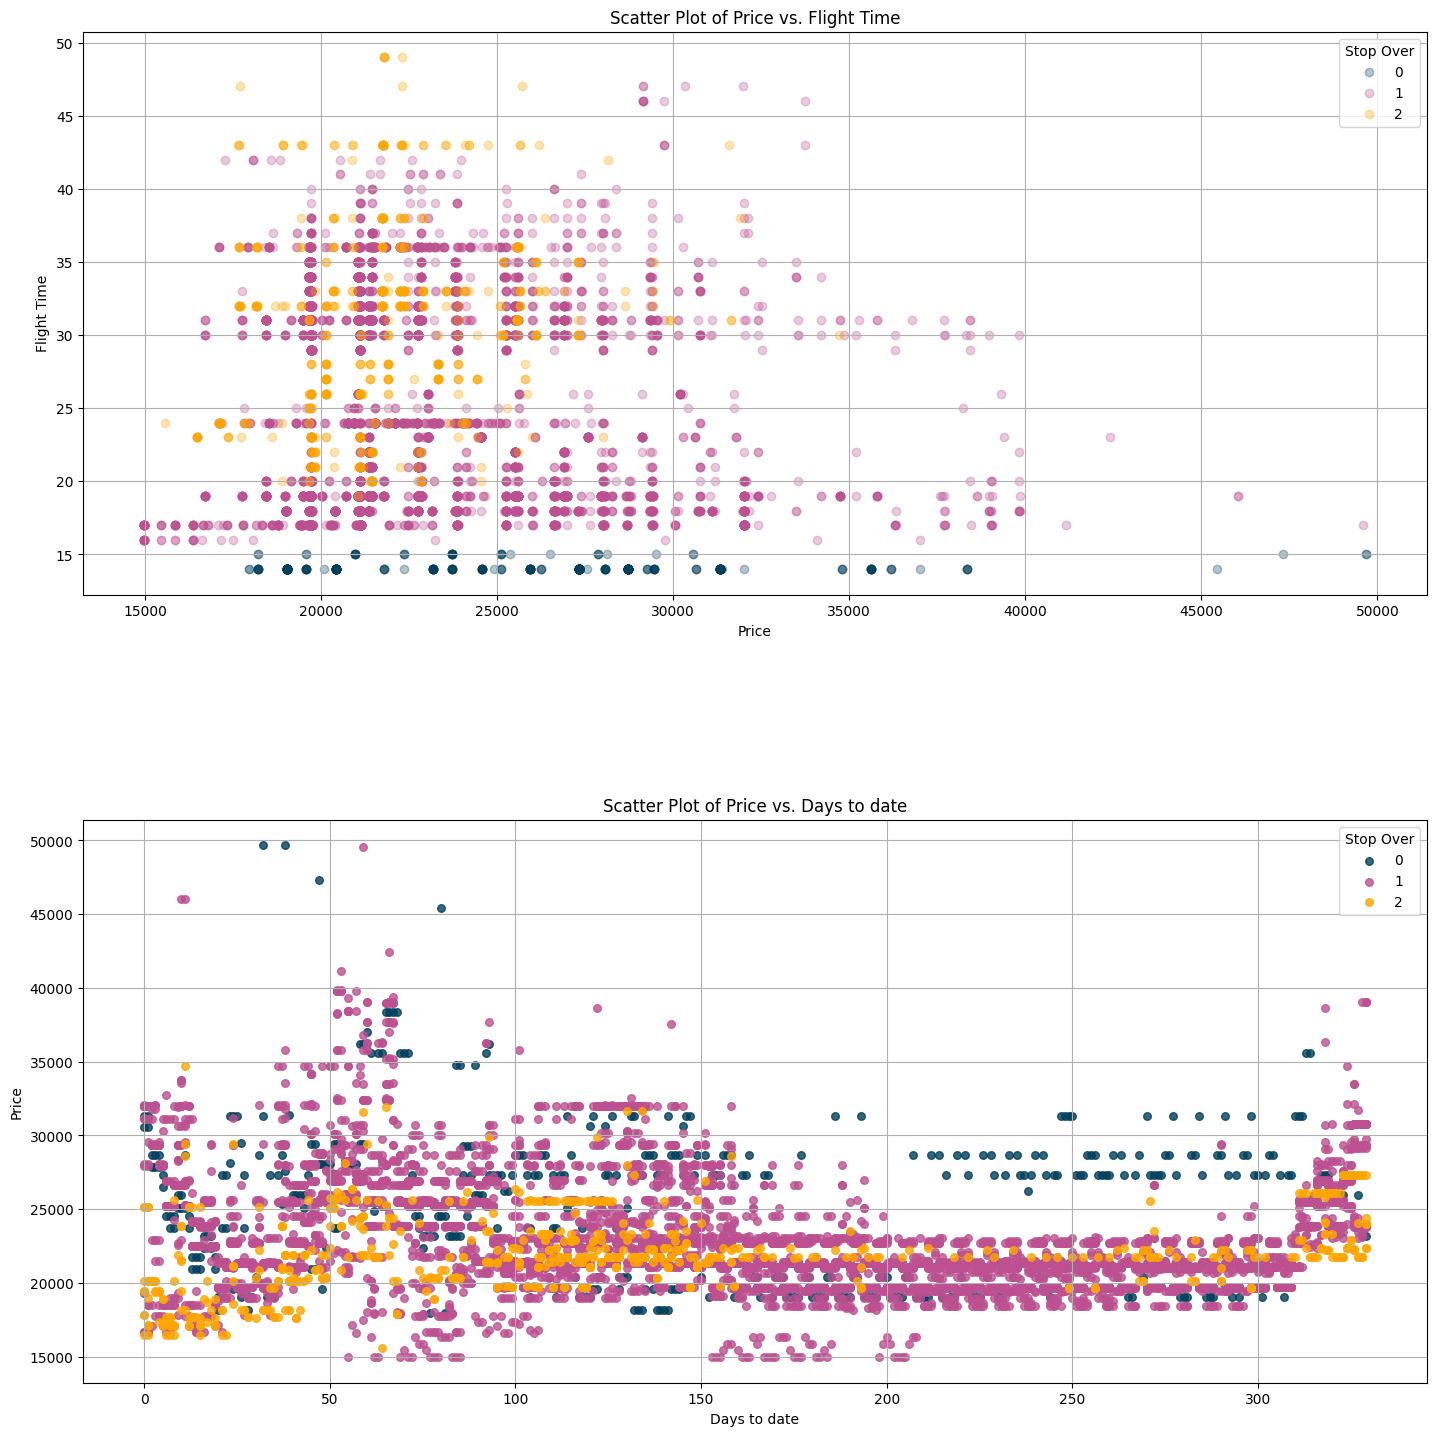

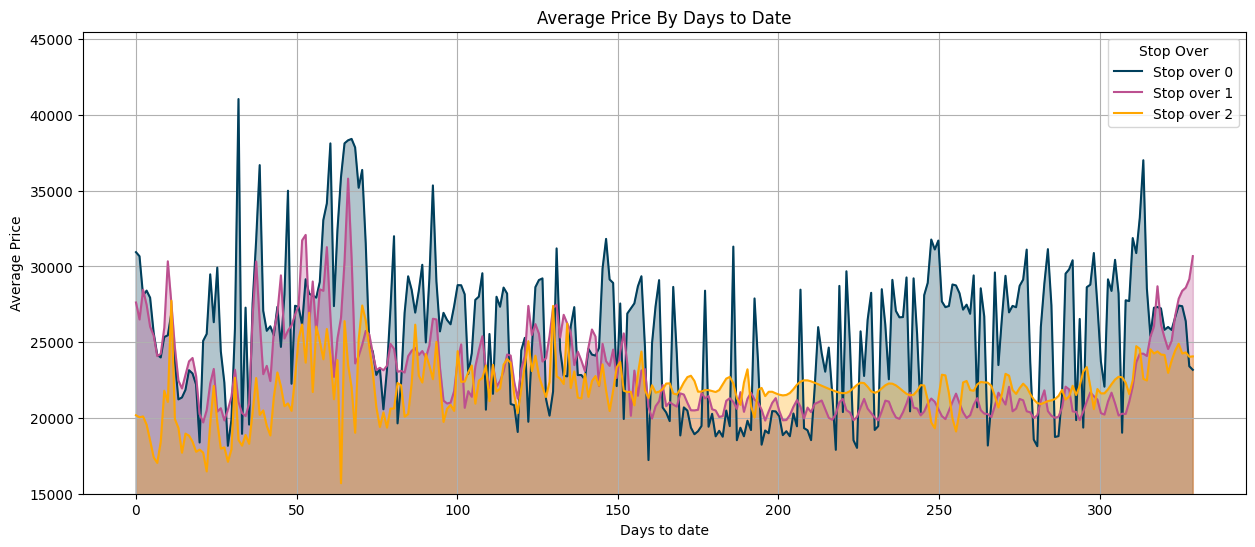

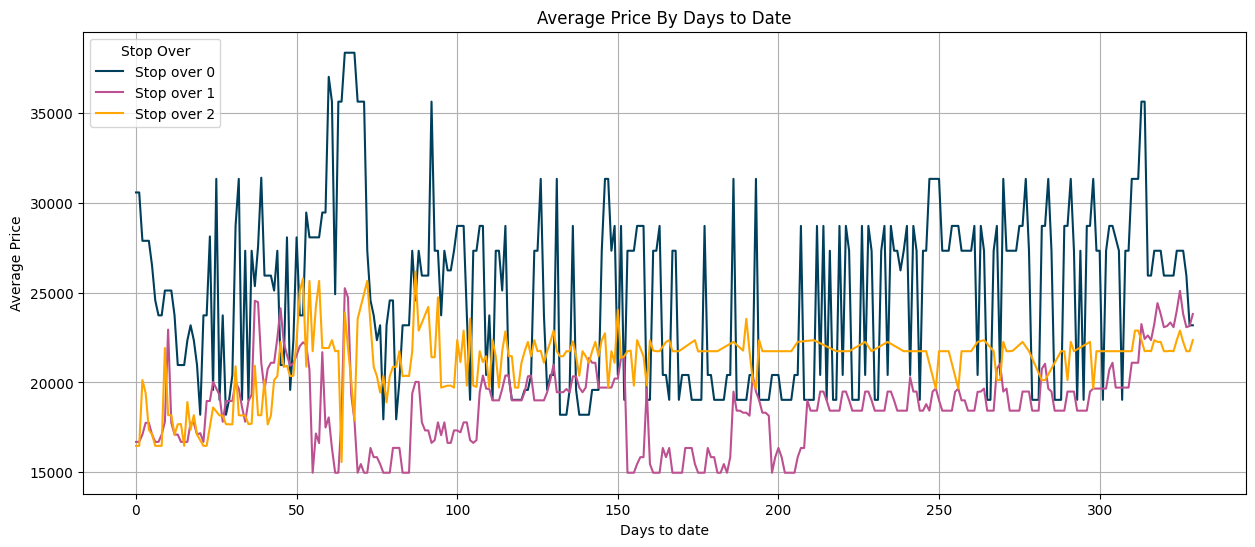

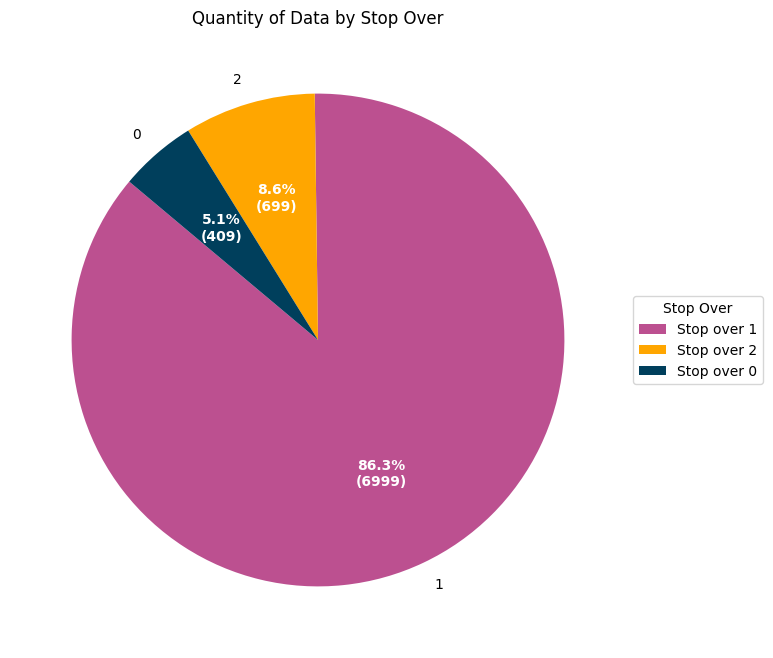

IQR: 4790.0
lower_bound: 3943.0
upper_bound: 40347.0


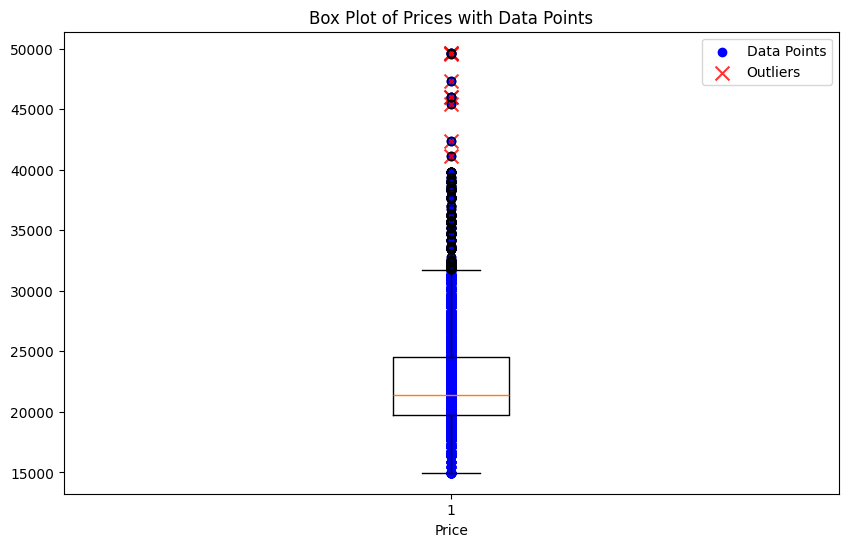

IQR: 8294.0
lower_bound: -1151.4000000000015
upper_bound: 50271.4
len outliners:0
len df: 410
IQR: 4264.0
lower_bound: 8625.6
upper_bound: 35062.4
len outliners:76
len df: 6999
IQR: 3189.0
lower_bound: 11834.6
upper_bound: 31606.4
len outliners:4
len df: 699


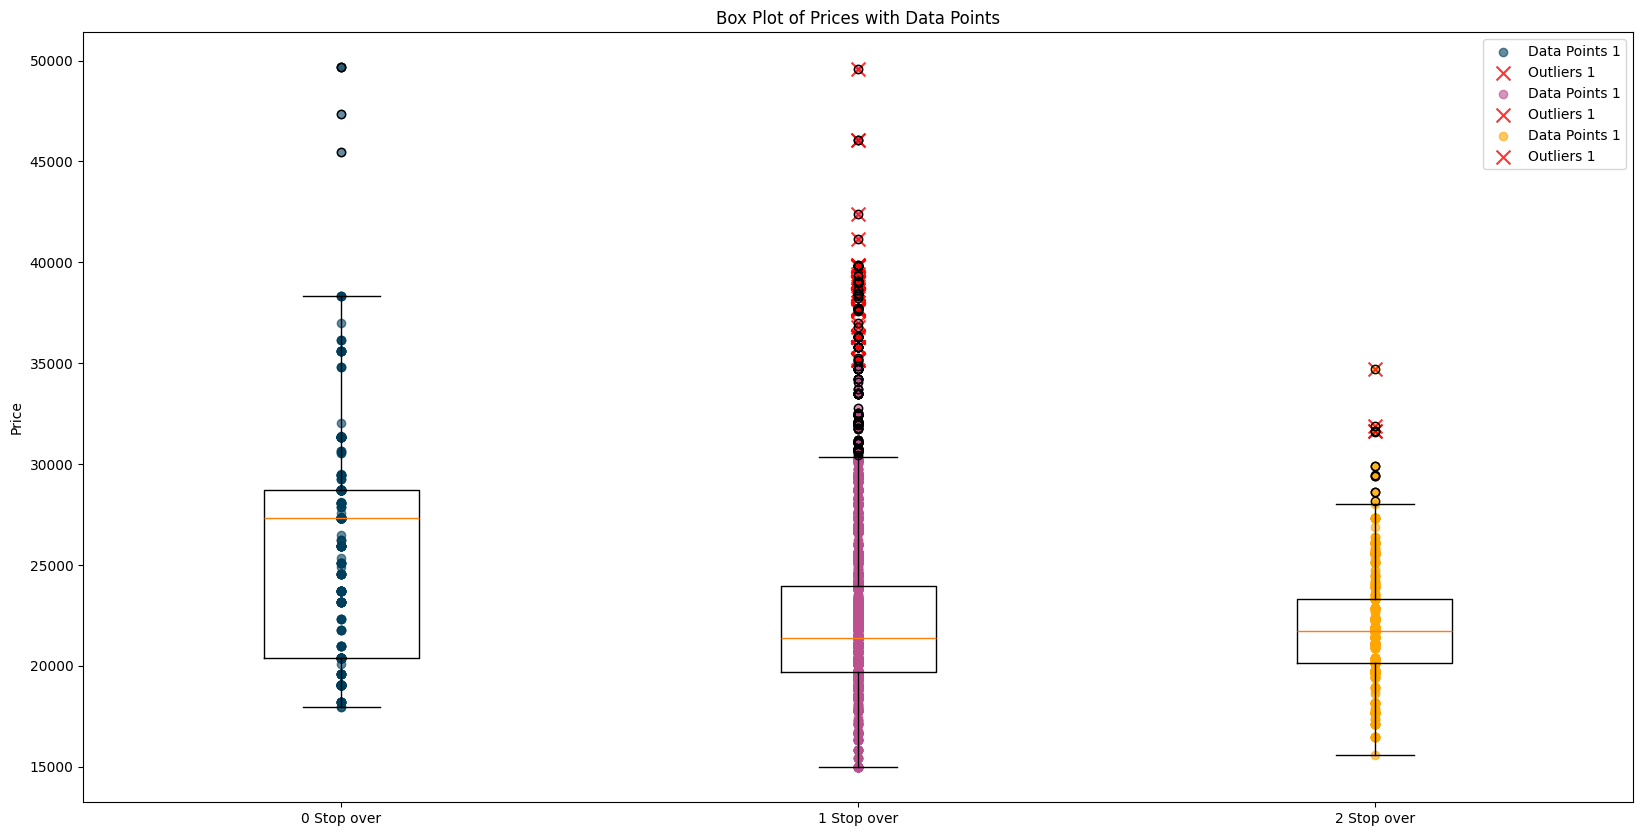

In [39]:
from IPython.display import display, Markdown

# Mostrar texto formateado
display(Markdown("""
# Análisis de Datos de Vuelo

En este análisis, vamos a visualizar la relación entre el precio y el tiempo de vuelo, así como la distribución de precios y la relación entre el precio y el número de escalas.

## Gráficos

1. **Scatter Plot**: Relación entre el precio y el tiempo de vuelo.
2. **Histograma**: Distribución de precios.
3. **Box Plot**: Relación entre el precio y el número de escalas.
"""))


fig, axs = plt.subplots(2, 1, figsize=(15, 15),height_ratios=[1, 1])

color_dict = {0: '#003f5c', 1: '#bc5090', 2: '#ffa600'}


# Crear el gráfico de dispersión
for stop_over in range(0,3):
    subset = df_train[df_train['Stop over'] == stop_over]
    axs[0].scatter(subset['Price'], subset['Flight time'], color=color_dict[stop_over], label=stop_over, alpha=0.3)

# Personalizar el gráfico
axs[0].set_title('Scatter Plot of Price vs. Flight Time')
axs[0].set_xlabel('Price')
axs[0].set_ylabel('Flight Time')
axs[0].grid(True)
axs[0].legend(title='Stop Over')


for stop_over in range(0,3):
    subset = df_train[df_train['Stop over'] == stop_over]
    axs[1].scatter( subset['Days to date'],subset['Price'], color=color_dict[stop_over],s=30, label=stop_over, alpha=.8,marker='o')

# Personalizar el gráfico
axs[1].set_title('Scatter Plot of Price vs. Days to date')
axs[1].set_xlabel('Days to date')
axs[1].set_ylabel('Price')
axs[1].grid(True)
axs[1].legend(title='Stop Over')

plt.tight_layout(pad=3.0)  # Ajustar el padding entre los subplots
plt.subplots_adjust(hspace=0.4)





from scipy.interpolate import make_interp_spline

grouped_days_stop_over = df_train.groupby(['Days to date', 'Stop over'])['Price'].mean().reset_index()

plt.figure(figsize=(15, 6))

# Definir el diccionario de colores
color_dict = {0: '#003f5c', 1: '#bc5090', 2: '#ffa600'}

# Crear las líneas para cada número de escalas
for stop_over in range(0, 3):
    subset = grouped_days_stop_over[grouped_days_stop_over['Stop over'] == stop_over]
    x = subset['Days to date']
    y = subset['Price']

    # Suavizar las líneas
    x_smooth = np.linspace(x.min(), x.max(), 300)
    spl = make_interp_spline(x, y, k=3)
    y_smooth = spl(x_smooth)

    # Crear el gráfico de líneas suaves
    plt.plot(x_smooth, y_smooth, color=color_dict[stop_over], linestyle='-', label=f'Stop over {stop_over}')

    # Crear áreas sombreadas
    plt.fill_between(x_smooth, y_smooth, color=color_dict[stop_over], alpha=0.3)

# Personalizar el gráfico
plt.title('Average Price By Days to Date')
plt.xlabel('Days to date')
plt.ylabel('Average Price')
plt.legend(title='Stop Over')
plt.grid(True)
# Ajustar el rango del eje y para que comience en 15,000
plt.ylim(15000, grouped_days_stop_over['Price'].max() + 5000)

# Mostrar el gráfico
plt.show()






plt.figure(figsize=(15, 6))

for stop_over in range(0,3):
    subset = grouped_days_stop_over_min[grouped_days_stop_over_min['Stop over'] == stop_over]
    plt.plot(subset['Days to date'],subset['Price'], color=color_dict[stop_over], linestyle='-', label=f'Stop over {stop_over}')
'''plt.plot(grouped_days_stop_over['Days to date'], grouped_days_stop_over['Price'], color='b', linestyle='-', label='Stop over 0')
plt.plot(grouped_days_stop_over['Days to date'], grouped_days_stop_over['Price'], color='g', linestyle='--', label='Stop over 1')
plt.plot(grouped_days_stop_over['Days to date'], grouped_days_stop_over['Price'], color='r', linestyle='-.', label='Stop over 2')'''

# Personalizar el gráfico
plt.title('Average Price By Days to Date')
plt.xlabel('Days to date')
plt.ylabel('Average Price')
plt.legend(title='Stop Over')
plt.grid(True)

stop_over_counts = df_train['Stop over'].value_counts()
colors = [color_dict[key] for key in stop_over_counts.index]








plt.figure(figsize=(8, 8))

# Función para mostrar números y porcentajes en las etiquetas
def func(pct, allvals):
    absolute = int(pct/100.*sum(allvals))
    return "{:.1f}%\n({:d})".format(pct, absolute)

# Crear el gráfico de pastel
wedges, texts, autotexts = plt.pie(stop_over_counts, labels=stop_over_counts.index, autopct=lambda pct: func(pct, stop_over_counts), colors=colors, startangle=140)

# Personalizar las etiquetas
for text in texts:
    text.set_color('black')
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_weight('bold')

# Agregar la leyenda ordenada
plt.legend(wedges, [f'Stop over {i}' for i in stop_over_counts.index], title="Stop Over", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

# Personalizar el gráfico
plt.title('Quantity of Data by Stop Over')
# Mostrar el gráfico
plt.show()








df = df_train

# Create a box plot to visualize outliers
plt.figure(figsize=(10, 6))
plt.boxplot(df['Price'], vert=True)
plt.title('Box Plot of Prices with Data Points')
plt.xlabel('Price')

# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df['Price'].quantile(0.25)
Q3 = df['Price'].quantile(0.75)
IQR = Q3 - Q1  # Interquartile range

# Define outlier criteria
lower_bound = Q1 - 3.3 * IQR
upper_bound = Q3 + 3.3 * IQR
print("IQR:", IQR)
print("lower_bound:", lower_bound)
print("upper_bound:", upper_bound)

# Identify outliers
outliers = df[(df['Price'] < lower_bound) | (df['Price'] > upper_bound)]


# Plot all data points
plt.scatter( np.ones(len(df)),df['Price'], color='blue', alpha=1, label='Data Points')

# Highlight the outliers
plt.scatter( np.ones(len(outliers)),outliers['Price'], color='red', alpha=0.8,s=100, label='Outliers', marker='x')

# Add legend
plt.legend()

# Display the chart
plt.show()







df1 = df_train[df_train['Stop over'].astype(str) == '0']
df2 = df_train[df_train['Stop over'].astype(str) == '1']
df3 = df_train[df_train['Stop over'].astype(str) == '2']

fig, ax = plt.subplots(figsize=(20, 10))

# Create box plots for multiple sets of prices
positions = [1, 2,3]  # Positions for the box plots
ax.boxplot([df1['Price'], df2['Price'],df3['Price']], positions=positions, vert=True)

ax.set_title('Box Plot of Prices with Data Points')
ax.set_ylabel('Price')
ax.set_xticks(positions)
ax.set_xticklabels(['0 Stop over', '1 Stop over', '2 Stop over'])

def example(df,position):
    color_dict = {0: '#003f5c', 1: '#bc5090', 2: '#ffa600'}
    colors = ['#003f5c', '#bc5090','#ffa600']
    # Calculate Q1 (25th percentile) and Q3 (75th percentile) for the first set of prices
    Q1_1 = df['Price'].quantile(0.25)
    Q3_1 = df['Price'].quantile(0.75)
    IQR_1 = Q3_1 - Q1_1  # Interquartile range

    # Define outlier criteria for the first set of prices
    lower_bound_1 = Q1_1 - 2.6 * IQR_1
    upper_bound_1 = Q3_1 + 2.6 * IQR_1

    print("IQR:", IQR_1)
    print("lower_bound:", lower_bound_1)
    print("upper_bound:", upper_bound_1)

    # Identify outliers for the first set of prices
    outliers_1 = df[(df['Price'] < lower_bound_1) | (df['Price'] > upper_bound_1)]

    print('len outliners:'+str(len(outliers_1)))
    print('len df:',str(len(df)))

    # Plot all data points for the first set of prices
    ax.scatter(np.ones(len(df)) * positions[position], df['Price'], color=colors[position], alpha=0.6, label='Data Points 1')

    # Highlight the outliers for the first set of prices
    ax.scatter(np.ones(len(outliers_1)) * positions[position], outliers_1['Price'], color='red', alpha=0.8, label='Outliers 1',s=100, marker='x')

example(df1,0)
example(df2,1)
example(df3,2)
# Add legend
ax.legend()

# Display the chart
plt.show()




In [12]:

# Calculate Q1 (25th percentile) and Q3 (75th percentile) for the first set of prices
Q1_1 = df_train['Price'].quantile(0.25)
Q3_1 = df_train['Price'].quantile(0.75)
IQR_1 = Q3_1 - Q1_1  # Interquartile range

# Define outlier criteria for the first set of prices
lower_bound_1 = Q1_1 - 3.3 * IQR_1
upper_bound_1 = Q3_1 + 3.3 * IQR_1

print("IQR:", IQR_1)
print("lower_bound:", lower_bound_1)
print("upper_bound:", upper_bound_1)

# Identify outliers for the first set of prices
df_train = df_train[(df_train['Price'] > lower_bound_1) & (df_train['Price'] < upper_bound_1)]
len(df_train)

IQR: 4790.0
lower_bound: 3943.0
upper_bound: 40347.0


8099

In [148]:
len(df_train)

8023

In [13]:
df_so_0 = df_train[df_train['Stop over'] == 0]
df_so_1 = df_train[df_train['Stop over'] == 1]
df_so_2 = df_train[df_train['Stop over'] == 2]

print(len(df_so_0))
print(len(df_so_1))
print(len(df_so_2))

def outliners(df):
    Q1_1 = df['Price'].quantile(0.25)
    Q3_1 = df['Price'].quantile(0.75)
    IQR_1 = Q3_1 - Q1_1  # Interquartile range

    # Define outlier criteria for the first set of prices
    lower_bound_1 = Q1_1 - 2.6 * IQR_1
    upper_bound_1 = Q3_1 + 2.6 * IQR_1

    print("IQR:", IQR_1)
    print("lower_bound:", lower_bound_1)
    print("upper_bound:", upper_bound_1)

    # Identify outliers for the first set of prices
    df = df[(df['Price'] > lower_bound_1) & (df['Price'] < upper_bound_1)]


    return df


df_so_0 = outliners(df_so_0)
df_so_1 = outliners(df_so_1)
df_so_2 = outliners(df_so_2)
df_train = pd.concat([df_so_0, df_so_1, df_so_2], ignore_index=True)


406
6994
699
IQR: 8294.0
lower_bound: -1151.4000000000015
upper_bound: 50271.4
IQR: 4185.0
lower_bound: 8831.0
upper_bound: 34778.0
IQR: 3189.0
lower_bound: 11834.6
upper_bound: 31606.4


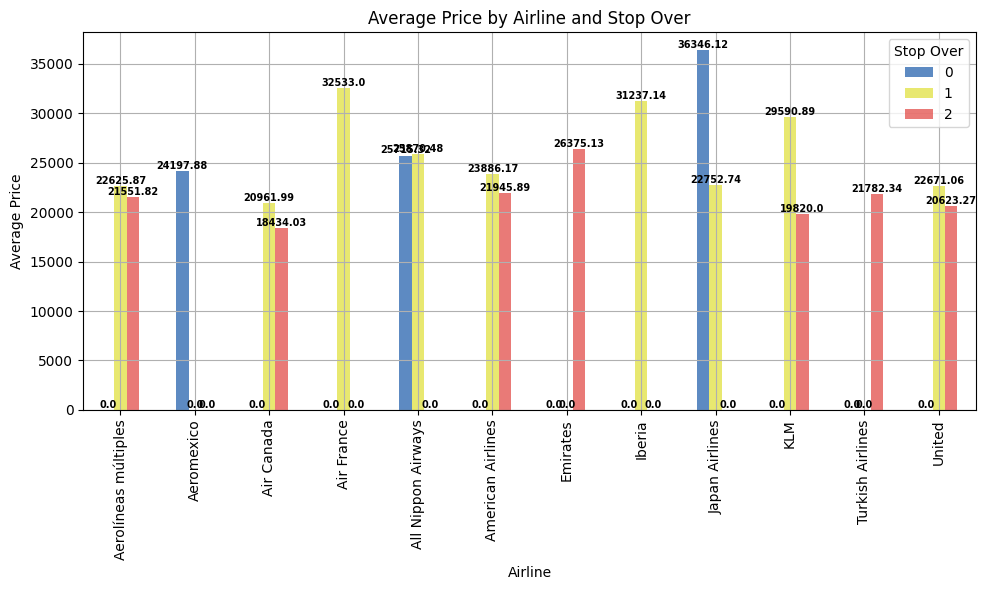

In [ ]:
grouped_df = df_train.groupby(['Airline', 'Stop over'])['Price'].mean().unstack()

fig, ax = plt.subplots(figsize=(10, 6))

# Crear la gráfica de barras agrupadas
colors = ['#1858a9', '#dfdf34','#e1423d']  # Lista de colores para las barras
grouped_df.plot(kind='bar', ax=ax, alpha=0.7, color=colors)

# Personalizar la gráfica
ax.set_title('Average Price by Airline and Stop Over')
ax.set_xlabel('Airline')
ax.set_ylabel('Average Price')
ax.grid(True)
ax.legend(title='Stop Over')

# Añadir etiquetas a las barras
def add_labels(bars, ax):
    for bar in bars:
        yval = bar.get_height()
        ax.text(
            bar.get_x() + bar.get_width() / 2, 
            yval + 2,  # Añadir un poco de padding a la etiqueta
            round(yval, 2), 
            ha='center', 
            va='bottom',
            fontsize=7,  # Tamaño de la fuente
            color='black',  # Color de la fuente
            fontweight='bold'  # Grosor de la fuente
        )

# Añadir etiquetas a cada barra
for container in ax.containers:
    add_labels(container, ax)

# Mostrar la gráfica
plt.tight_layout()
plt.show()

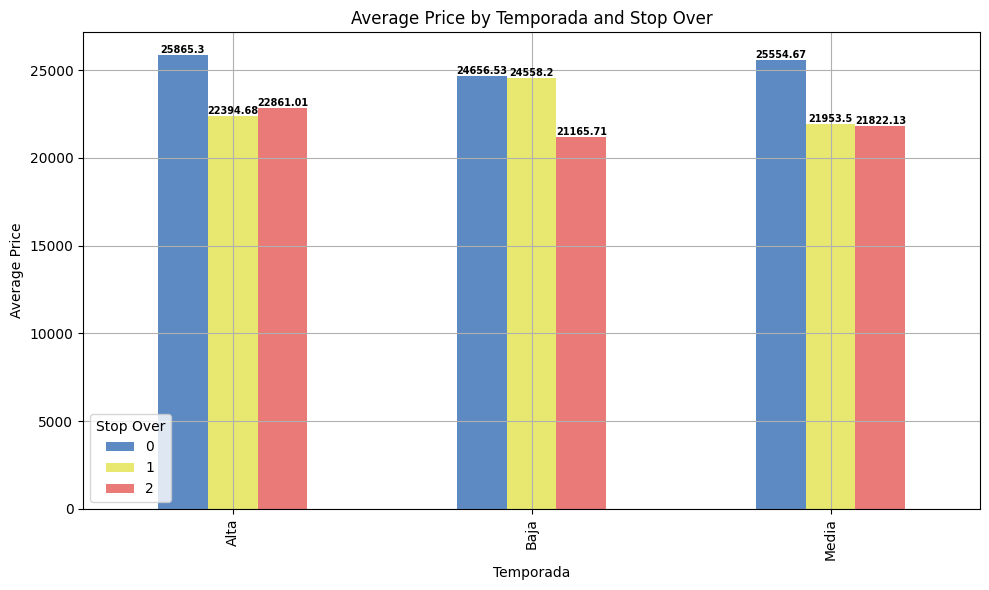

In [16]:
# Agrupar por temporada y tipo de "stop over" y calcular el precio promedio
grouped_df = df_train.groupby(['Temporada', 'Stop over'])['Price'].mean().unstack()

fig, ax = plt.subplots(figsize=(10, 6))

# Crear la gráfica de barras agrupadas
colors = ['#1858a9', '#dfdf34','#e1423d']  # Lista de colores para las barras
grouped_df.plot(kind='bar', ax=ax, alpha=0.7, color=colors)

# Personalizar la gráfica
ax.set_title('Average Price by Temporada and Stop Over')
ax.set_xlabel('Temporada')
ax.set_ylabel('Average Price')
ax.grid(True)
ax.legend(title='Stop Over')

# Añadir etiquetas a las barras
def add_labels(bars, ax):
    for bar in bars:
        yval = bar.get_height()
        ax.text(
            bar.get_x() + bar.get_width() / 2, 
            yval + 2,  # Añadir un poco de padding a la etiqueta
            round(yval, 2), 
            ha='center', 
            va='bottom',
            fontsize=7,  # Tamaño de la fuente
            color='black',  # Color de la fuente
            fontweight='bold'  # Grosor de la fuente
        )

# Añadir etiquetas a cada barra
for container in ax.containers:
    add_labels(container, ax)

# Mostrar la gráfica
plt.tight_layout()
plt.show()

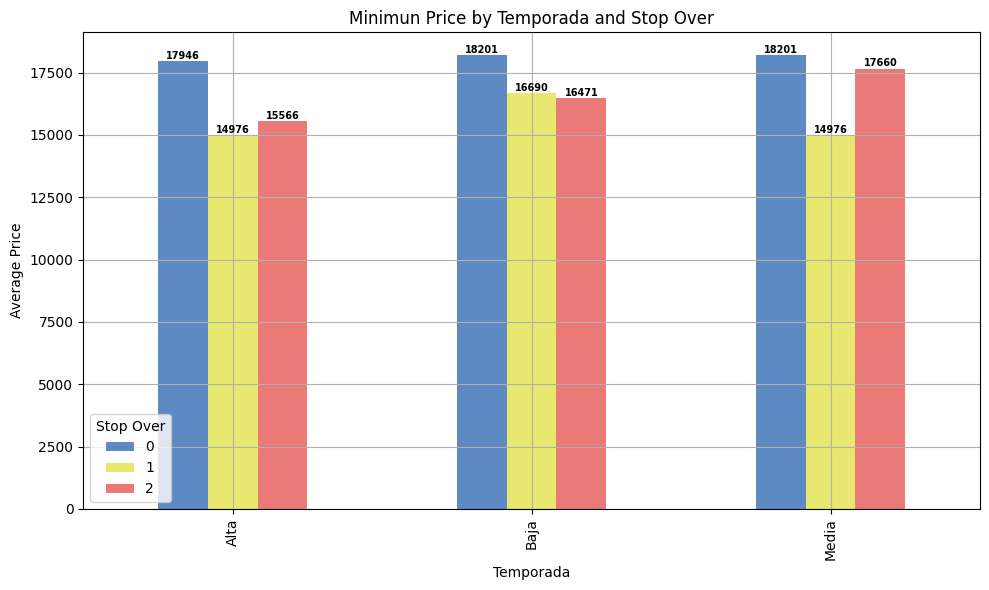

In [17]:
# Agrupar por temporada y tipo de "stop over" y calcular el precio promedio
grouped_df = df_train.groupby(['Temporada', 'Stop over'])['Price'].min().unstack()

fig, ax = plt.subplots(figsize=(10, 6))

# Crear la gráfica de barras agrupadas
colors = ['#1858a9', '#dfdf34','#e1423d']  # Lista de colores para las barras
grouped_df.plot(kind='bar', ax=ax, alpha=0.7, color=colors)

# Personalizar la gráfica
ax.set_title('Minimun Price by Temporada and Stop Over')
ax.set_xlabel('Temporada')
ax.set_ylabel('Average Price')
ax.grid(True)
ax.legend(title='Stop Over')

# Añadir etiquetas a las barras
def add_labels(bars, ax):
    for bar in bars:
        yval = bar.get_height()
        ax.text(
            bar.get_x() + bar.get_width() / 2, 
            yval + 2,  # Añadir un poco de padding a la etiqueta
            round(yval, 2), 
            ha='center', 
            va='bottom',
            fontsize=7,  # Tamaño de la fuente
            color='black',  # Color de la fuente
            fontweight='bold'  # Grosor de la fuente
        )

# Añadir etiquetas a cada barra
for container in ax.containers:
    add_labels(container, ax)

# Mostrar la gráfica
plt.tight_layout()
plt.show()

Text(0, 0.5, 'Average Price')

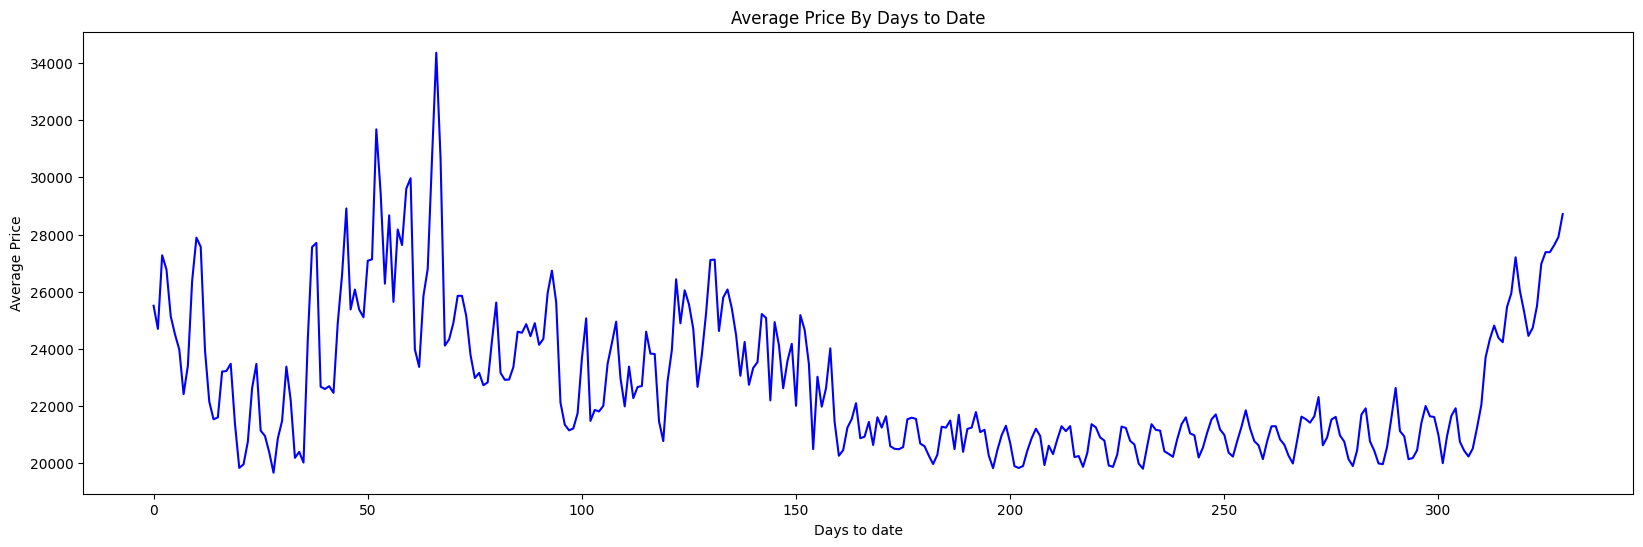

In [39]:
plt.figure(figsize=(20, 6))

plt.plot(grouped_df_days_to['Days to date'], grouped_df_days_to['Price'], color='b', linestyle='-', label='Line 1 (solid)')
plt.title('Average Price By Days to Date')
plt.xlabel('Days to date')
plt.ylabel('Average Price')

IQR: 4790.0
lower_bound: 3943.0
upper_bound: 40347.0


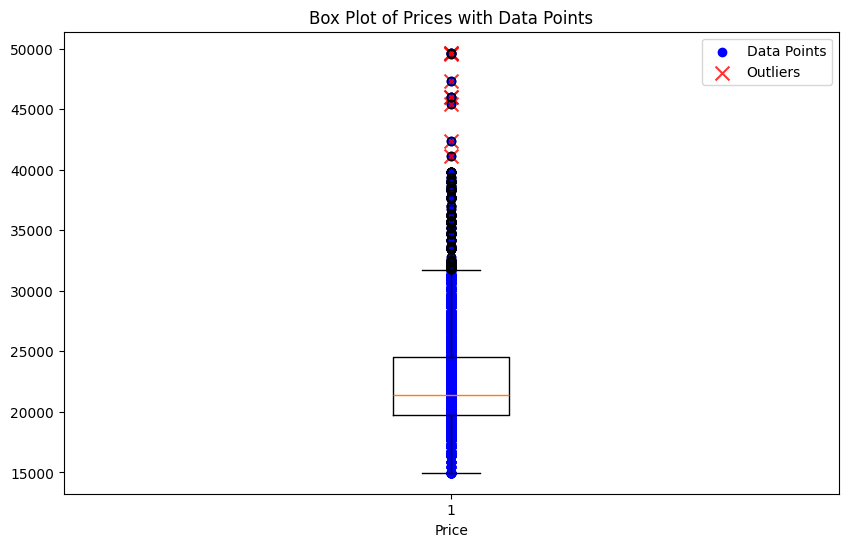

In [44]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Sample data
data = {
    'Price': [100, 150, 200, 120, 180, 300, 400, 500, 600, 700, 800, 900, 1000,1700]
}
df = df_train

# Create a box plot to visualize outliers
plt.figure(figsize=(10, 6))
plt.boxplot(df['Price'], vert=True)
plt.title('Box Plot of Prices with Data Points')
plt.xlabel('Price')

# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df['Price'].quantile(0.25)
Q3 = df['Price'].quantile(0.75)
IQR = Q3 - Q1  # Interquartile range

# Define outlier criteria
lower_bound = Q1 - 3.3 * IQR
upper_bound = Q3 + 3.3 * IQR
print("IQR:", IQR)
print("lower_bound:", lower_bound)
print("upper_bound:", upper_bound)

# Identify outliers
outliers = df[(df['Price'] < lower_bound) | (df['Price'] > upper_bound)]


# Plot all data points
plt.scatter( np.ones(len(df)),df['Price'], color='blue', alpha=1, label='Data Points')

# Highlight the outliers
plt.scatter( np.ones(len(outliers)),outliers['Price'], color='red', alpha=0.8,s=100, label='Outliers', marker='x')

# Add legend
plt.legend()

# Display the chart
plt.show()

IQR: 8294.0
lower_bound: 7972.0
upper_bound: 41148.0
len outliners:4
len df: 410
IQR: 4264.0
lower_bound: 13316.0
upper_bound: 30372.0
len outliners:321
len df: 6999
IQR: 3189.0
lower_bound: 15342.5
upper_bound: 28098.5
len outliners:13
len df: 699


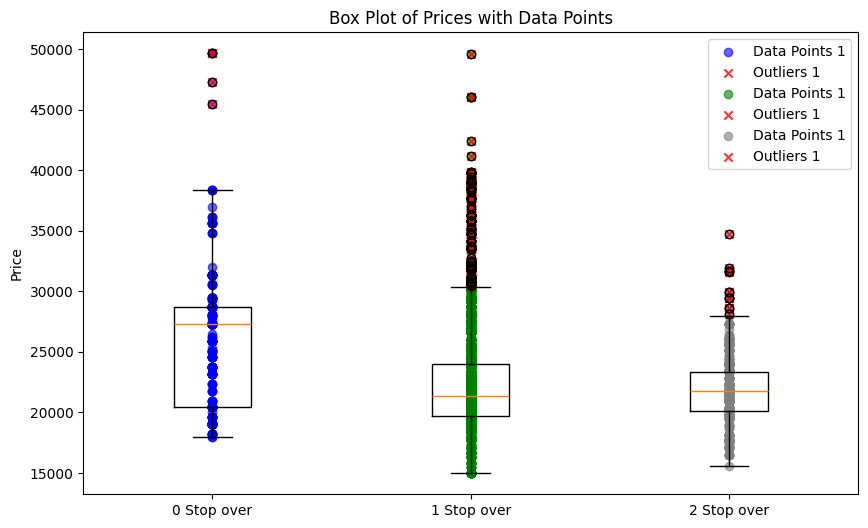

In [56]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Sample data
data1 = {
    'Price': [100, 150, 200, 120, 180, 300, 400, 500, 600, 700, 800, 900, 1000, 1700]
}
data2 = {
    'Price': [90, 140, 210, 110, 170, 310, 390, 510, 590, 710, 790, 910, 1010, 1600]
}


df1 = df_train[df_train['Stop over'].astype(str) == '0']
df2 = df_train[df_train['Stop over'].astype(str) == '1']
df3 = df_train[df_train['Stop over'].astype(str) == '2']

fig, ax = plt.subplots(figsize=(10, 6))

# Create box plots for multiple sets of prices
positions = [1, 2,3]  # Positions for the box plots
ax.boxplot([df1['Price'], df2['Price'],df3['Price']], positions=positions, vert=True)

ax.set_title('Box Plot of Prices with Data Points')
ax.set_ylabel('Price')
ax.set_xticks(positions)
ax.set_xticklabels(['0 Stop over', '1 Stop over', '2 Stop over'])




def example(df,position):
    colors = ['blue', 'green','grey']
    # Calculate Q1 (25th percentile) and Q3 (75th percentile) for the first set of prices
    Q1_1 = df['Price'].quantile(0.25)
    Q3_1 = df['Price'].quantile(0.75)
    IQR_1 = Q3_1 - Q1_1  # Interquartile range

    # Define outlier criteria for the first set of prices
    lower_bound_1 = Q1_1 - 1.5 * IQR_1
    upper_bound_1 = Q3_1 + 1.5 * IQR_1

    print("IQR:", IQR_1)
    print("lower_bound:", lower_bound_1)
    print("upper_bound:", upper_bound_1)

    # Identify outliers for the first set of prices
    outliers_1 = df[(df['Price'] < lower_bound_1) | (df['Price'] > upper_bound_1)]

    print('len outliners:'+str(len(outliers_1)))
    print('len df:',str(len(df)))

    # Plot all data points for the first set of prices
    ax.scatter(np.ones(len(df)) * positions[position], df['Price'], color=colors[position], alpha=0.6, label='Data Points 1')

    # Highlight the outliers for the first set of prices
    ax.scatter(np.ones(len(outliers_1)) * positions[position], outliers_1['Price'], color='red', alpha=0.8, label='Outliers 1', marker='x')

example(df1,0)
example(df2,1)
example(df3,2)
'''# Calculate Q1 (25th percentile) and Q3 (75th percentile) for the first set of prices
Q1_1 = df1['Price'].quantile(0.25)
Q3_1 = df1['Price'].quantile(0.75)
IQR_1 = Q3_1 - Q1_1  # Interquartile range

# Define outlier criteria for the first set of prices
lower_bound_1 = Q1_1 - 1.5 * IQR_1
upper_bound_1 = Q3_1 + 1.5 * IQR_1

# Identify outliers for the first set of prices
outliers_1 = df1[(df1['Price'] < lower_bound_1) | (df1['Price'] > upper_bound_1)]

# Plot all data points for the first set of prices
ax.scatter(np.ones(len(df1)) * positions[0], df1['Price'], color='blue', alpha=0.6, label='Data Points 1')

# Highlight the outliers for the first set of prices
ax.scatter(np.ones(len(outliers_1)) * positions[0], outliers_1['Price'], color='red', alpha=0.8, label='Outliers 1', marker='x')





# Calculate Q1 (25th percentile) and Q3 (75th percentile) for the second set of prices
Q1_2 = df2['Price'].quantile(0.25)
Q3_2 = df2['Price'].quantile(0.75)
IQR_2 = Q3_2 - Q1_2  # Interquartile range

# Define outlier criteria for the second set of prices
lower_bound_2 = Q1_2 - 1.5 * IQR_2
upper_bound_2 = Q3_2 + 1.5 * IQR_2

# Identify outliers for the second set of prices
outliers_2 = df2[(df2['Price'] < lower_bound_2) | (df2['Price'] > upper_bound_2)]

# Plot all data points for the second set of prices
ax.scatter(np.ones(len(df2)) * positions[1], df2['Price'], color='green', alpha=0.6, label='Data Points 2')

# Highlight the outliers for the second set of prices
ax.scatter(np.ones(len(outliers_2)) * positions[1], outliers_2['Price'], color='orange', alpha=0.8, label='Outliers 2', marker='x')'''

# Add legend
ax.legend()

# Display the chart
plt.show()
